Pertama, untuk K-Means Clustering, soal mungkin akan menanyakan mengapa kolom Species dihapus sebelum melakukan clustering menggunakan k-means. Kemudian, soal dapat meminta penjelasan mengenai hasil analisis clustering, khususnya interpretasi dari perintah table(aktual=iris$Species, prediksi=kmeans.result$cluster). Selain itu, Anda mungkin diminta untuk menjelaskan bagaimana plot sebar menggambarkan hasil clustering, termasuk pentingnya titik pusat klaster yang ditampilkan pada plot.

            prediksi
aktual        1  2  3
  setosa     17  0 33
  versicolor  4 46  0
  virginica   0 50  0

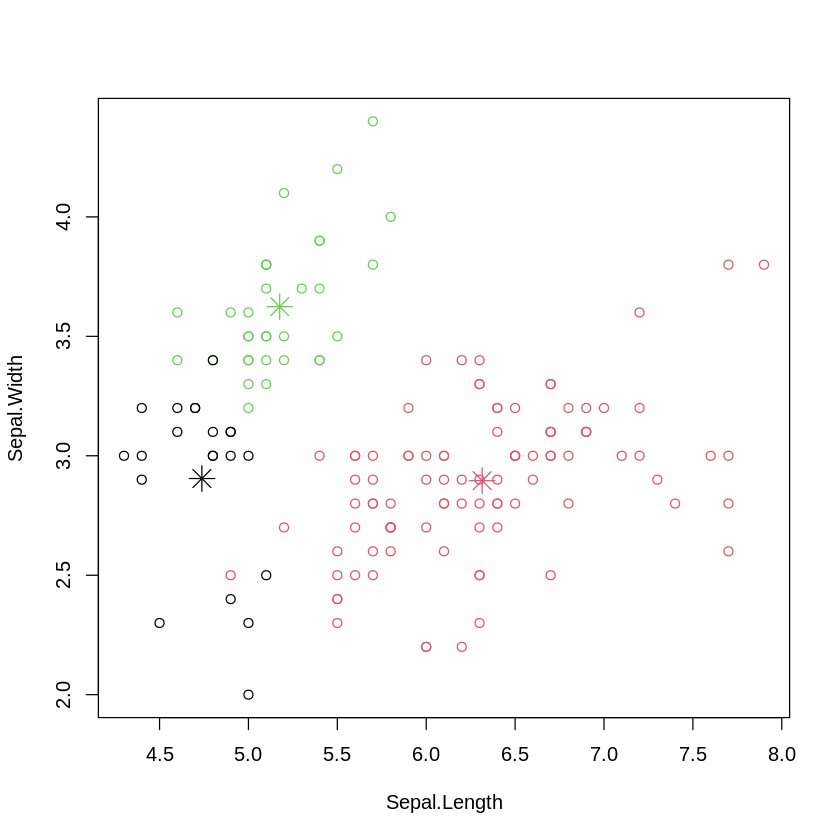

In [1]:
iris_kmeans <- iris
iris_kmeans$Species <- NULL

# Apply k-means clustering with 3 clusters
kmeans.result <- kmeans(iris_kmeans, 3)

# Compare actual species with predicted clusters
table(aktual=iris$Species, prediksi=kmeans.result$cluster)

# Plot Sepal Length vs. Sepal Width by cluster
plot(iris_kmeans[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster)
points(kmeans.result$centers[,c("Sepal.Length","Sepal.Width")], col = 1:3, pch = 8, cex=2)


Kedua, untuk K-Nearest Neighbors (k-NN) Classification, soal bisa meminta Anda menjelaskan proses pembagian dataset menjadi data training dan testing dalam implementasi k-NN ini. Soal juga bisa menanyakan peran parameter k dalam algoritma k-NN dan bagaimana parameter tersebut mempengaruhi hasil klasifikasi. Anda mungkin diminta untuk menginterpretasikan output dari perintah table(knn.result) serta mendiskusikan akurasi dari klasifikasi k-NN dalam konteks ini.

In [2]:
# Prepare training and testing datasets
fiturSetosa <- iris[1:25, 1:4]
testSetosa <- iris[26:50, 1:4]
fiturVersicolor <- iris[51:75, 1:4]
testVersicolor <- iris[76:100, 1:4]
fiturVirginica <- iris[101:125, 1:4]
testVirginica <- iris[126:150, 1:4]
train <- rbind(fiturSetosa, fiturVersicolor, fiturVirginica)
test <- rbind(testSetosa, testVersicolor, testVirginica)
cl <- factor(c(rep("setosa",25), rep("versicolor",25),rep("virginica",25)))

# Apply k-NN with k=3
library(class)
knn.result <- knn(train, test, cl, k = 3, prob=TRUE)

# Display k-NN results
table(knn.result)


knn.result
    setosa versicolor  virginica 
        25         26         24 

Terakhir, untuk Hierarchical Clustering, soal mungkin akan meminta Anda menjelaskan tujuan dari clustering hirarkis dan bagaimana dendrogram digunakan untuk memvisualisasikan hasilnya. Soal juga bisa menanyakan interpretasi dari perintah rect.hclust(hc, k=3) dan pentingnya memotong dendrogram menjadi 3 klaster. Selain itu, Anda mungkin diminta untuk membahas bagaimana akurasi dari clustering hirarkis dihitung dan menginterpretasikan nilai akurasiHirarki.

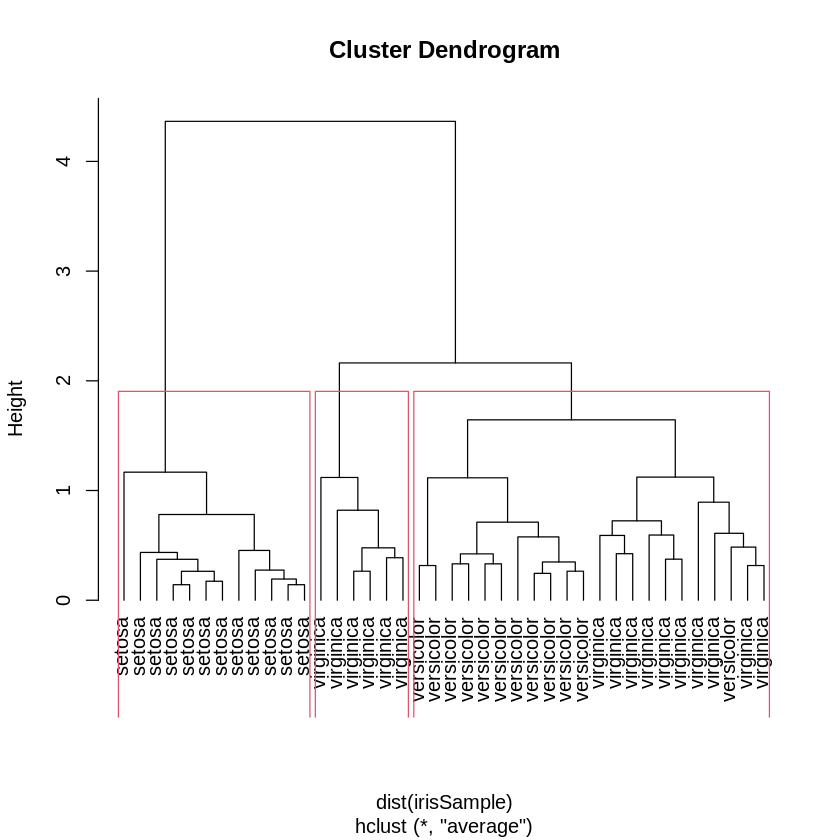

In [3]:
set.seed(1234)
idx <- sample(1:dim(iris)[1], 40)
irisSample <- iris[idx,]
kelasAktual <- irisSample$Species
irisSample$Species <- NULL

# Perform hierarchical clustering and plot dendrogram
hc <- hclust(dist(irisSample), method="ave")
plot(hc, hang = -1, labels=iris$Species[idx])
rect.hclust(hc, k=3)

# Compare actual species with predicted groups
groups <- cutree(hc, k=3)
tabelPrediksiHirarki <- table(aktual=kelasAktual, prediksi=groups)
akurasiHirarki <- sum(diag(tabelPrediksiHirarki)/sum(tabelPrediksiHirarki))
